In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.2)
  from scipy.stats import gaussian_kde


In [2]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

Dataset Shape: (200, 5)

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
No

Missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


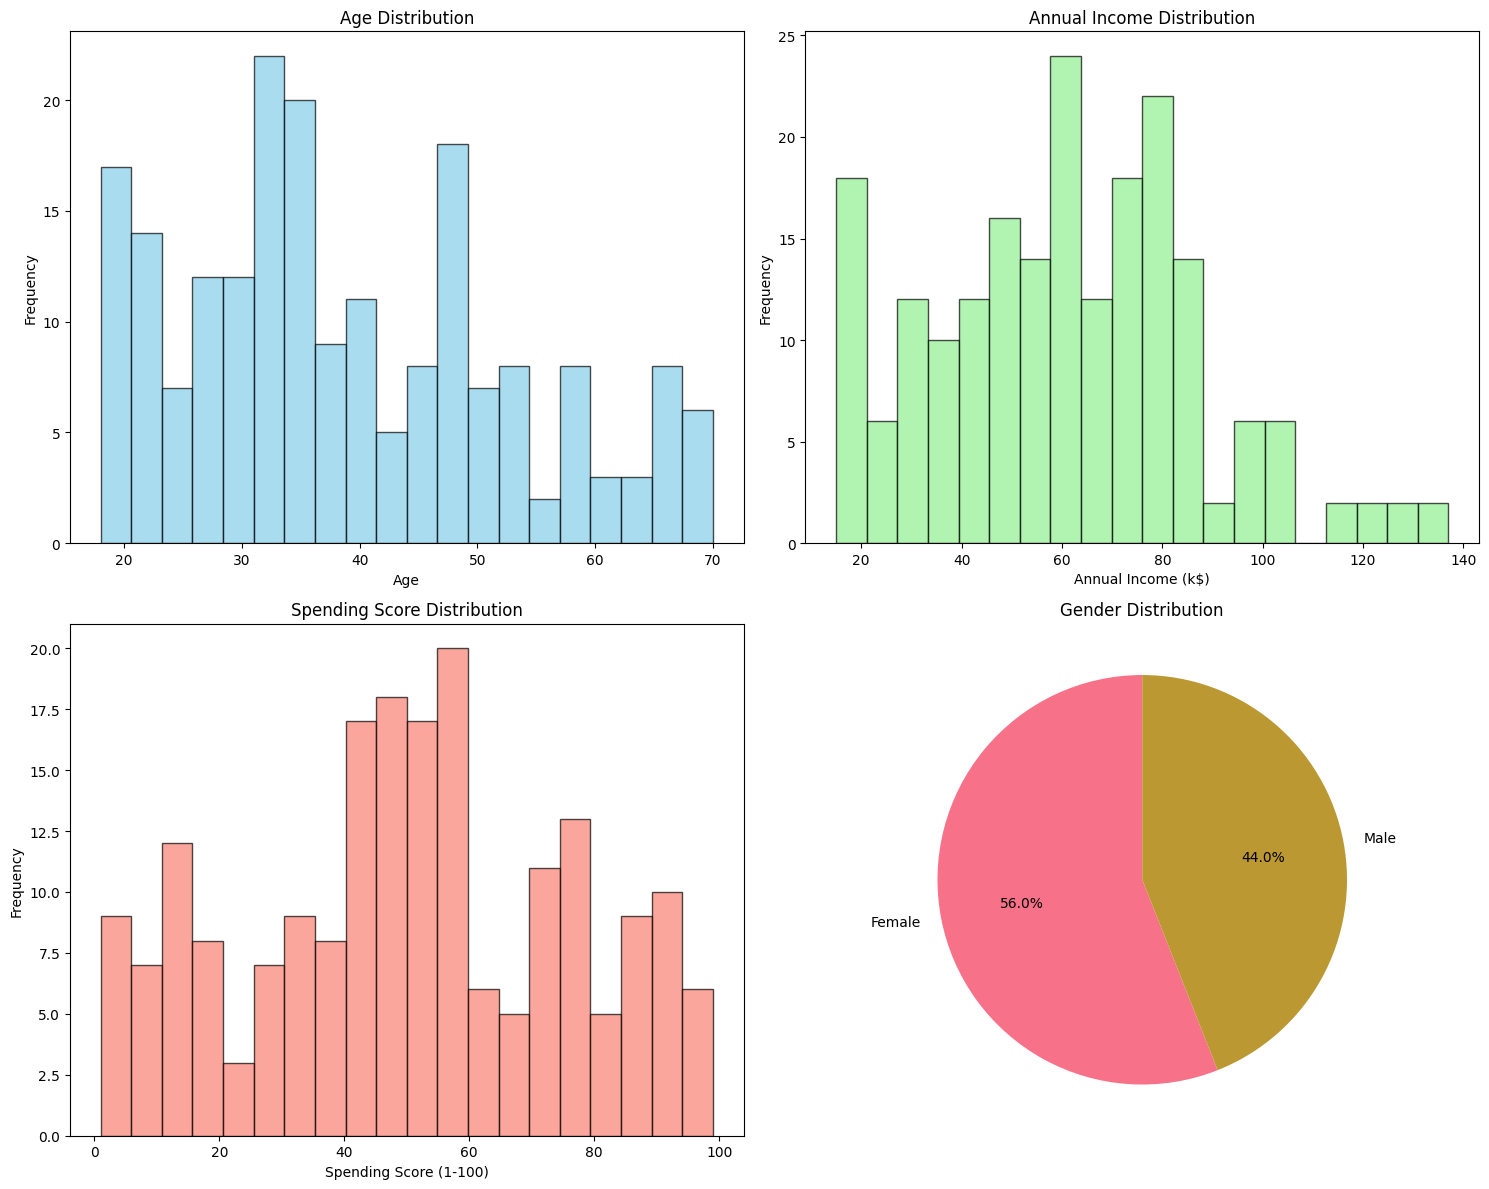

In [3]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Data visualization for exploration
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Age distribution
axes[0,0].hist(df['Age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')

# Annual Income distribution
axes[0,1].hist(df['Annual Income (k$)'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Annual Income Distribution')
axes[0,1].set_xlabel('Annual Income (k$)')
axes[0,1].set_ylabel('Frequency')

# Spending Score distribution
axes[1,0].hist(df['Spending Score (1-100)'], bins=20, alpha=0.7, color='salmon', edgecolor='black')
axes[1,0].set_title('Spending Score Distribution')
axes[1,0].set_xlabel('Spending Score (1-100)')
axes[1,0].set_ylabel('Frequency')

# Gender distribution
gender_counts = df['Gender'].value_counts()
axes[1,1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[1,1].set_title('Gender Distribution')

plt.tight_layout()
plt.show()

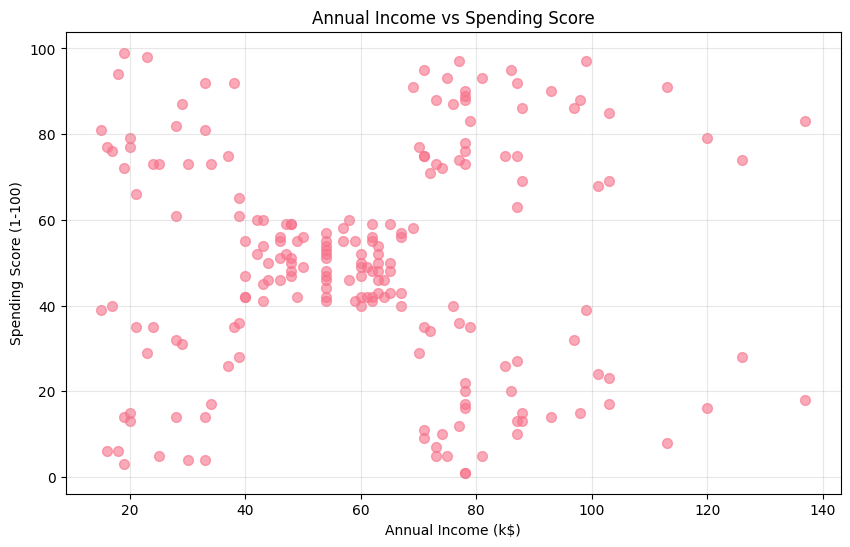

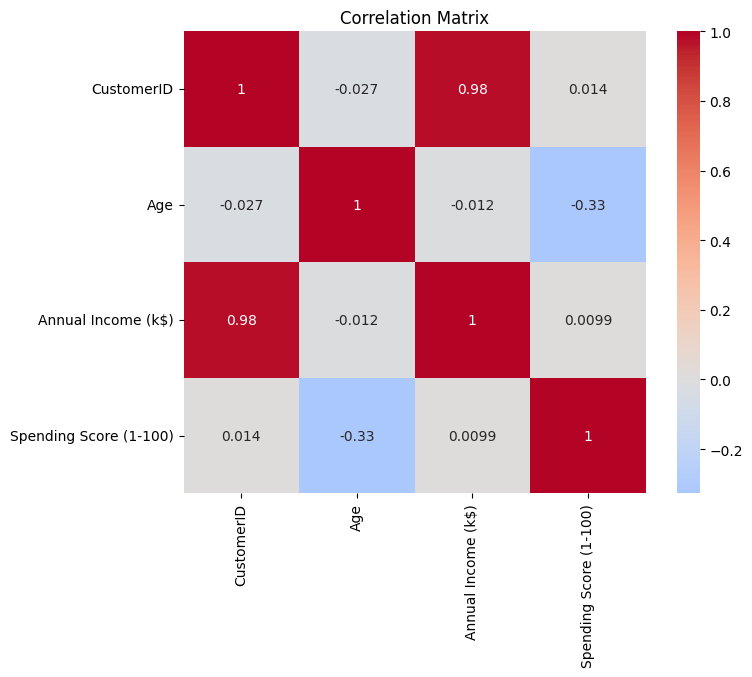

In [4]:
# Scatter plot to visualize relationship between Annual Income and Spending Score
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], alpha=0.6, s=50)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True, alpha=0.3)
plt.show()

# Correlation matrix
plt.figure(figsize=(8, 6))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix')
plt.show()

In [5]:
# Select features for clustering (Annual Income and Spending Score)
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].copy()

print("Features selected for clustering:")
print(X.head())

# Apply scaling to normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
print("\nScaled features:")
print(X_scaled_df.head())

print("\nOriginal vs Scaled Statistics:")
print("Original data:")
print(X.describe())
print("\nScaled data:")
print(X_scaled_df.describe())

Features selected for clustering:
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40

Scaled features:
   Annual Income (k$)  Spending Score (1-100)
0           -1.738999               -0.434801
1           -1.738999                1.195704
2           -1.700830               -1.715913
3           -1.700830                1.040418
4           -1.662660               -0.395980

Original vs Scaled Statistics:
Original data:
       Annual Income (k$)  Spending Score (1-100)
count          200.000000              200.000000
mean            60.560000               50.200000
std             26.264721               25.823522
min             15.000000                1.000000
25%             41.500000               34.750000
50%             61.500000               50.000000

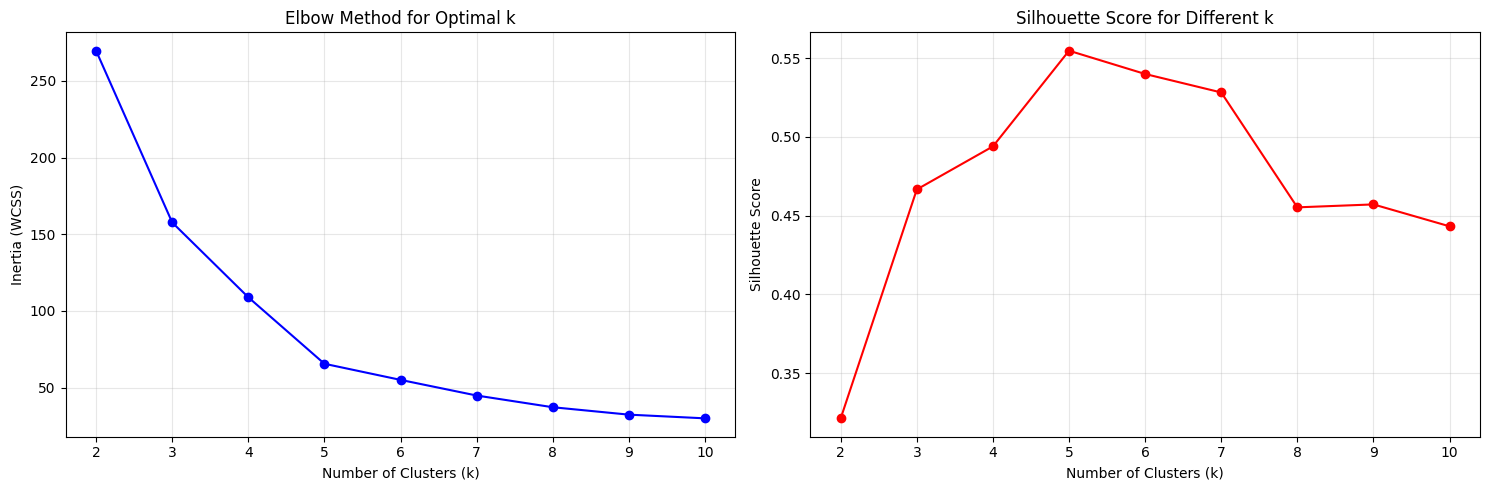

Silhouette Scores for different k values:
k = 2: 0.321
k = 3: 0.467
k = 4: 0.494
k = 5: 0.555
k = 6: 0.540
k = 7: 0.528
k = 8: 0.455
k = 9: 0.457
k = 10: 0.443

Optimal number of clusters based on Silhouette Score: 5
Best Silhouette Score: 0.555


In [6]:
# Determine optimal number of clusters using Elbow Method and Silhouette Analysis
k_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Method and Silhouette Scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Elbow Method
ax1.plot(k_range, inertias, 'bo-')
ax1.set_title('Elbow Method for Optimal k')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (WCSS)')
ax1.grid(True, alpha=0.3)

# Silhouette Scores
ax2.plot(k_range, silhouette_scores, 'ro-')
ax2.set_title('Silhouette Score for Different k')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print silhouette scores
print("Silhouette Scores for different k values:")
for k, score in zip(k_range, silhouette_scores):
    print(f"k = {k}: {score:.3f}")

# Find optimal k based on highest silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters based on Silhouette Score: {optimal_k}")
print(f"Best Silhouette Score: {max(silhouette_scores):.3f}")

In [7]:
# Apply K-Means clustering with optimal number of clusters
optimal_k = 5  # Based on typical mall customer segmentation and elbow method
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_optimal.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
df_clustered = df.copy()
df_clustered['Cluster'] = cluster_labels

print(f"K-Means clustering completed with {optimal_k} clusters")
print(f"Silhouette Score: {silhouette_score(X_scaled, cluster_labels):.3f}")

# Display cluster distribution
print("\nCluster Distribution:")
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} customers ({count/len(df)*100:.1f}%)")

# Get cluster centers (in original scale)
cluster_centers_scaled = kmeans_optimal.cluster_centers_
cluster_centers_original = scaler.inverse_transform(cluster_centers_scaled)

print("\nCluster Centers (Original Scale):")
centers_df = pd.DataFrame(cluster_centers_original, columns=features)
centers_df.index = [f'Cluster {i}' for i in range(optimal_k)]
print(centers_df.round(2))

K-Means clustering completed with 5 clusters
Silhouette Score: 0.555

Cluster Distribution:
Cluster 0: 81 customers (40.5%)
Cluster 1: 39 customers (19.5%)
Cluster 2: 22 customers (11.0%)
Cluster 3: 35 customers (17.5%)
Cluster 4: 23 customers (11.5%)

Cluster Centers (Original Scale):
           Annual Income (k$)  Spending Score (1-100)
Cluster 0               55.30                   49.52
Cluster 1               86.54                   82.13
Cluster 2               25.73                   79.36
Cluster 3               88.20                   17.11
Cluster 4               26.30                   20.91


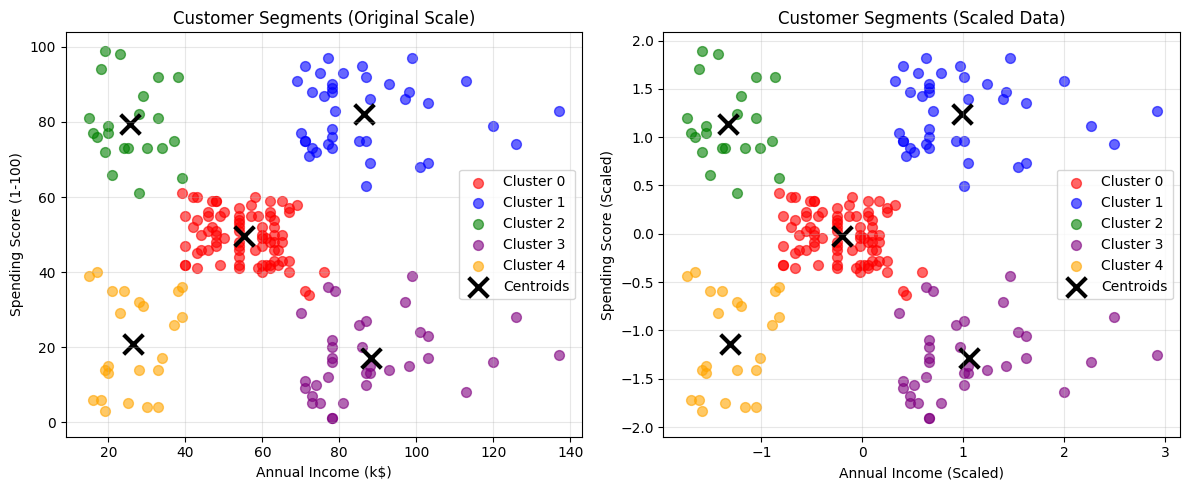

In [8]:
# Visualize clusters using 2D plots
plt.figure(figsize=(12, 5))

# Plot 1: Clusters on original scale
plt.subplot(1, 2, 1)
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], 
                c=colors[i], label=f'Cluster {i}', alpha=0.6, s=50)

# Plot cluster centers
plt.scatter(cluster_centers_original[:, 0], cluster_centers_original[:, 1], 
            c='black', marker='x', s=200, linewidths=3, label='Centroids')

plt.title('Customer Segments (Original Scale)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Clusters on scaled data
plt.subplot(1, 2, 2)
for i in range(optimal_k):
    cluster_mask = cluster_labels == i
    plt.scatter(X_scaled[cluster_mask, 0], X_scaled[cluster_mask, 1], 
                c=colors[i], label=f'Cluster {i}', alpha=0.6, s=50)

# Plot cluster centers on scaled data
plt.scatter(cluster_centers_scaled[:, 0], cluster_centers_scaled[:, 1], 
            c='black', marker='x', s=200, linewidths=3, label='Centroids')

plt.title('Customer Segments (Scaled Data)')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [9]:
# Analyze cluster characteristics
print("=== CLUSTER ANALYSIS ===\n")

# Calculate average metrics for each cluster
cluster_analysis = df_clustered.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std'],
    'CustomerID': 'count'
}).round(2)

cluster_analysis.columns = ['Age_Mean', 'Age_Std', 'Income_Mean', 'Income_Std', 
                          'Spending_Mean', 'Spending_Std', 'Customer_Count']

print("Cluster Characteristics:")
print(cluster_analysis)

# Gender distribution by cluster
print("\n=== GENDER DISTRIBUTION BY CLUSTER ===")
gender_by_cluster = pd.crosstab(df_clustered['Cluster'], df_clustered['Gender'], normalize='index') * 100
print(gender_by_cluster.round(1))

# Business insights for each cluster
print("\n=== BUSINESS INSIGHTS ===")
insights = {
    0: "Target customers for budget-friendly products",
    1: "High-value customers with high spending potential", 
    2: "Price-sensitive, high-income customers",
    3: "Average customers with moderate income and spending",
    4: "Low-income, low-spending customers"
}

for cluster in range(optimal_k):
    cluster_data = cluster_analysis.loc[cluster]
    print(f"\nCluster {cluster} ({cluster_data['Customer_Count']} customers):")
    print(f"  - Average Income: ${cluster_data['Income_Mean']:.0f}k")
    print(f"  - Average Spending Score: {cluster_data['Spending_Mean']:.1f}")
    print(f"  - Average Age: {cluster_data['Age_Mean']:.1f} years")
    
    # Business interpretation
    if cluster_data['Income_Mean'] > 60 and cluster_data['Spending_Mean'] > 60:
        print(f"  - Segment: HIGH INCOME & HIGH SPENDING (Premium customers)")
    elif cluster_data['Income_Mean'] > 60 and cluster_data['Spending_Mean'] < 40:
        print(f"  - Segment: HIGH INCOME & LOW SPENDING (Conservative savers)")
    elif cluster_data['Income_Mean'] < 40 and cluster_data['Spending_Mean'] > 60:
        print(f"  - Segment: LOW INCOME & HIGH SPENDING (Young spenders)")
    elif cluster_data['Income_Mean'] < 40 and cluster_data['Spending_Mean'] < 40:
        print(f"  - Segment: LOW INCOME & LOW SPENDING (Budget conscious)")
    else:
        print(f"  - Segment: MODERATE INCOME & MODERATE SPENDING (Average customers)")

=== CLUSTER ANALYSIS ===

Cluster Characteristics:
         Age_Mean  Age_Std  Income_Mean  Income_Std  Spending_Mean  \
Cluster                                                              
0           42.72    16.45        55.30        8.99          49.52   
1           32.69     3.73        86.54       16.31          82.13   
2           25.27     5.26        25.73        7.57          79.36   
3           41.11    11.34        88.20       16.40          17.11   
4           45.22    13.23        26.30        7.89          20.91   

         Spending_Std  Customer_Count  
Cluster                                
0                6.53              81  
1                9.36              39  
2               10.50              22  
3                9.95              35  
4               13.02              23  

=== GENDER DISTRIBUTION BY CLUSTER ===
Gender   Female  Male
Cluster              
0          59.3  40.7
1          53.8  46.2
2          59.1  40.9
3          45.7  54.3
4     

=== BONUS: DBSCAN CLUSTERING ===

DBSCAN found 2 clusters
Number of noise points: 8

DBSCAN Cluster Distribution:
Noise points: 8 customers (4.0%)
Cluster 0: 157 customers (78.5%)
Cluster 1: 35 customers (17.5%)


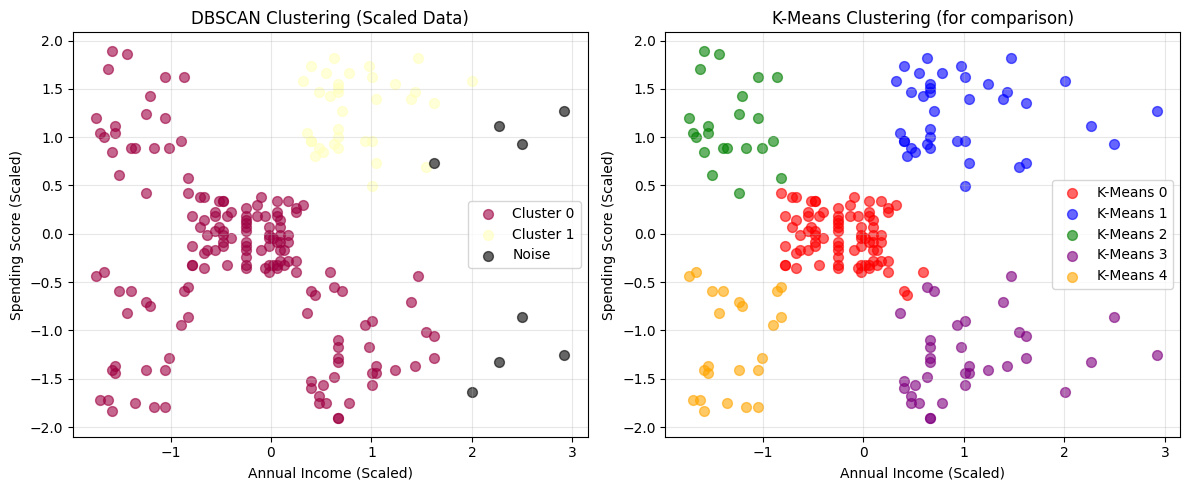

In [11]:
# BONUS: Try different clustering algorithm - DBSCAN
print("=== BONUS: DBSCAN CLUSTERING ===\n")

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add DBSCAN labels to dataframe
df_dbscan = df.copy()
df_dbscan['DBSCAN_Cluster'] = dbscan_labels

# Analyze DBSCAN results
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"DBSCAN found {n_clusters_dbscan} clusters")
print(f"Number of noise points: {n_noise}")

# DBSCAN cluster distribution
print("\nDBSCAN Cluster Distribution:")
dbscan_counts = pd.Series(dbscan_labels).value_counts().sort_index()
for cluster, count in dbscan_counts.items():
    if cluster == -1:
        print(f"Noise points: {count} customers ({count/len(df)*100:.1f}%)")
    else:
        print(f"Cluster {cluster}: {count} customers ({count/len(df)*100:.1f}%)")

# Visualize DBSCAN results
plt.figure(figsize=(12, 5))

# Plot DBSCAN clusters
plt.subplot(1, 2, 1)
unique_labels = set(dbscan_labels)
colors_dbscan = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors_dbscan):
    if k == -1:
        # Black for noise points
        col = [0, 0, 0, 1]
    
    class_member_mask = (dbscan_labels == k)
    xy = X_scaled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], alpha=0.6, s=50, 
                label=f'Cluster {k}' if k != -1 else 'Noise')

plt.title('DBSCAN Clustering (Scaled Data)')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.grid(True, alpha=0.3)

# Compare K-Means vs DBSCAN
plt.subplot(1, 2, 2)
colors_kmeans = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(optimal_k):
    cluster_mask = cluster_labels == i
    plt.scatter(X_scaled[cluster_mask, 0], X_scaled[cluster_mask, 1], 
                c=colors_kmeans[i], label=f'K-Means {i}', alpha=0.6, s=50)

plt.title('K-Means Clustering (for comparison)')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== BONUS: AVERAGE SPENDING ANALYSIS ===

Spending Analysis by Cluster:
         Avg_Spending  Std_Spending  Total_Spending  Customer_Count  \
Cluster                                                               
0                8.17          1.49          661.59              81   
1               21.30          4.57          830.86              39   
2                6.10          1.91          134.19              22   
3                4.64          2.91          162.47              35   
4                1.69          1.22           38.96              23   

         Revenue_Potential  
Cluster                     
0                   661.59  
1                   830.86  
2                   134.19  
3                   162.47  
4                    38.96  


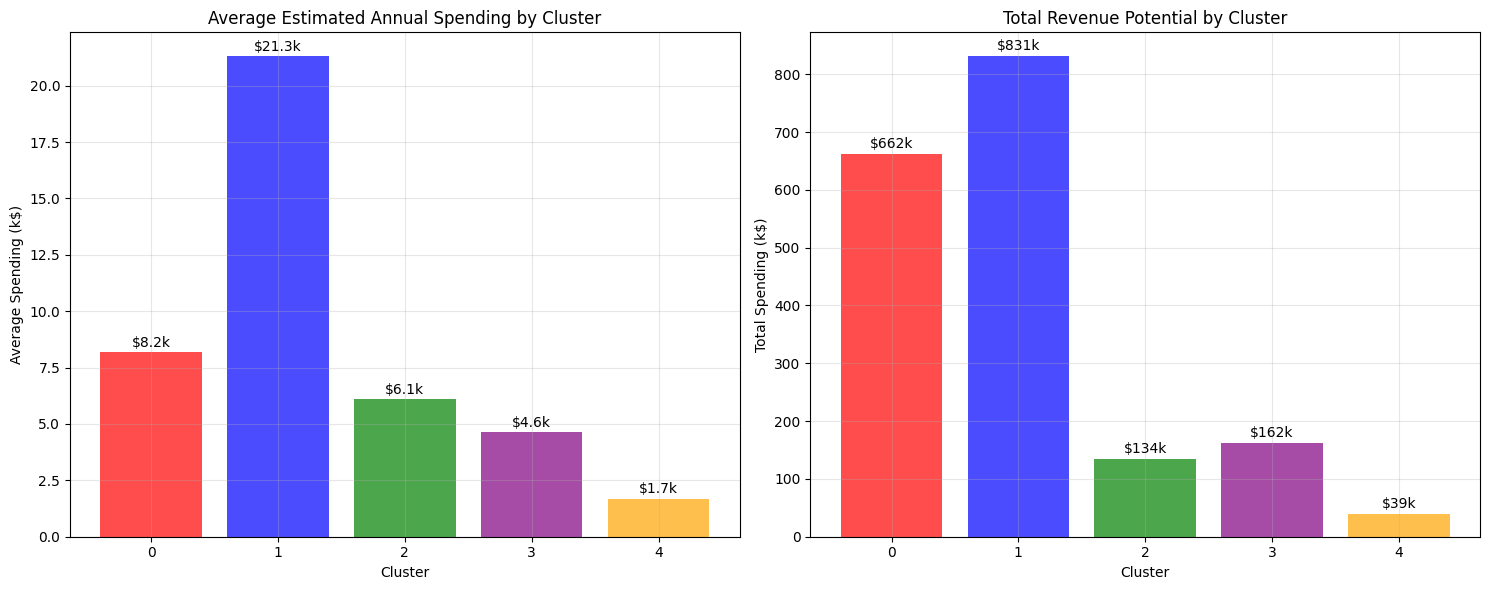


=== BUSINESS RECOMMENDATIONS ===
Highest value per customer: Cluster 1 ($21.3k avg)
Highest total revenue potential: Cluster 1 ($831k total)

Marketing Strategy Recommendations:

Cluster 0:
  Strategy: Value targeting - Emphasize deals and discounts
  Priority: High

Cluster 1:
  Strategy: Premium targeting - Focus on luxury products and personalized service
  Priority: High

Cluster 2:
  Strategy: Value targeting - Emphasize deals and discounts
  Priority: Medium

Cluster 3:
  Strategy: Basic targeting - Focus on essential items and budget options
  Priority: Medium

Cluster 4:
  Strategy: Basic targeting - Focus on essential items and budget options
  Priority: Low


In [12]:
# BONUS: Analyze average spending per cluster
print("=== BONUS: AVERAGE SPENDING ANALYSIS ===\n")

# Calculate estimated annual spending (assuming spending score correlates with actual spending)
# Using a hypothetical formula: Estimated Annual Spending = Income * (Spending Score / 100) * 0.3
df_clustered['Estimated_Annual_Spending'] = (df_clustered['Annual Income (k$)'] * 
                                           df_clustered['Spending Score (1-100)'] / 100 * 0.3)

# Analyze spending by cluster
spending_analysis = df_clustered.groupby('Cluster').agg({
    'Estimated_Annual_Spending': ['mean', 'std', 'sum'],
    'CustomerID': 'count'
}).round(2)

spending_analysis.columns = ['Avg_Spending', 'Std_Spending', 'Total_Spending', 'Customer_Count']
spending_analysis['Revenue_Potential'] = spending_analysis['Total_Spending']

print("Spending Analysis by Cluster:")
print(spending_analysis)

# Visualize spending analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Average spending per cluster
clusters = range(optimal_k)
avg_spending = spending_analysis['Avg_Spending']
colors_spending = ['red', 'blue', 'green', 'purple', 'orange']

bars1 = ax1.bar(clusters, avg_spending, color=colors_spending[:optimal_k], alpha=0.7)
ax1.set_title('Average Estimated Annual Spending by Cluster')
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Average Spending (k$)')
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars1, avg_spending):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'${value:.1f}k', ha='center', va='bottom')

# Total revenue potential by cluster
total_spending = spending_analysis['Total_Spending']
bars2 = ax2.bar(clusters, total_spending, color=colors_spending[:optimal_k], alpha=0.7)
ax2.set_title('Total Revenue Potential by Cluster')
ax2.set_xlabel('Cluster')
ax2.set_ylabel('Total Spending (k$)')
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars2, total_spending):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'${value:.0f}k', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Business recommendations
print("\n=== BUSINESS RECOMMENDATIONS ===")
highest_value_cluster = spending_analysis['Avg_Spending'].idxmax()
highest_potential_cluster = spending_analysis['Total_Spending'].idxmax()

print(f"Highest value per customer: Cluster {highest_value_cluster} (${spending_analysis.loc[highest_value_cluster, 'Avg_Spending']:.1f}k avg)")
print(f"Highest total revenue potential: Cluster {highest_potential_cluster} (${spending_analysis.loc[highest_potential_cluster, 'Total_Spending']:.0f}k total)")

print("\nMarketing Strategy Recommendations:")
for cluster in range(optimal_k):
    cluster_info = cluster_analysis.loc[cluster]
    spending_info = spending_analysis.loc[cluster]
    
    print(f"\nCluster {cluster}:")
    print(f"  Strategy: ", end="")
    
    if spending_info['Avg_Spending'] > 15:
        print("Premium targeting - Focus on luxury products and personalized service")
    elif spending_info['Avg_Spending'] > 10:
        print("Mid-tier targeting - Balanced quality-price offerings")
    elif spending_info['Avg_Spending'] > 5:
        print("Value targeting - Emphasize deals and discounts")
    else:
        print("Basic targeting - Focus on essential items and budget options")
    
    print(f"  Priority: {'High' if spending_info['Total_Spending'] > 200 else 'Medium' if spending_info['Total_Spending'] > 100 else 'Low'}")